In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import RobustScaler

In [30]:
#Load dataset and insert column names, remove the semicolon
#Data preprocessing

column_names= ["user_id", "activity", "timestamp", "axis_x", "axis_y", "axis_z"]
data = pd.read_csv('C:/HAR/WISDM/WISDM_ar_v1.1_raw.txt', header=None, names=column_names, comment=";", error_bad_lines=False)

C:\Users\jycha\AppData\Local\Temp\ipykernel_21760\1687917736.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('C:/HAR/WISDM/WISDM_ar_v1.1_raw.txt', header=None, names=column_names, comment=";", error_bad_lines=False)
Skipping line 832903: expected 6 fields, saw 7
Skipping line 832904: expected 6 fields, saw 7
Skipping line 832905: expected 6 fields, saw 7
Skipping line 832906: expected 6 fields, saw 7
Skipping line 832907: expected 6 fields, saw 7
Skipping line 832908: expected 6 fields, saw 7
Skipping line 832909: expected 6 fields, saw 7
Skipping line 832910: expected 6 fields, saw 7
Skipping line 832911: expected 6 fields, saw 7
Skipping line 832912: expected 6 fields, saw 7
Skipping line 832913: expected 6 fields, saw 7
Skipping line 832914: expected 6 fields, saw 7
Skipping line 832915: expected 6 fields, saw 7
Skipping line 832916: expected 6 fields, saw 7
Skipping

In [31]:
data = data.dropna()

In [32]:
print('Total rows : ', len(data))
data.head()

Total rows :  1086470


,user_id,activity,timestamp,axis_x,axis_y,axis_z
0,33,Jogging,49105962326000,-0.7,12.7,0.5
1,33,Jogging,49106062271000,5.0,11.3,1.0
2,33,Jogging,49106112167000,4.9,10.9,-0.1
3,33,Jogging,49106222305000,-0.6,18.5,3.0
4,33,Jogging,49106332290000,-1.2,12.1,7.2


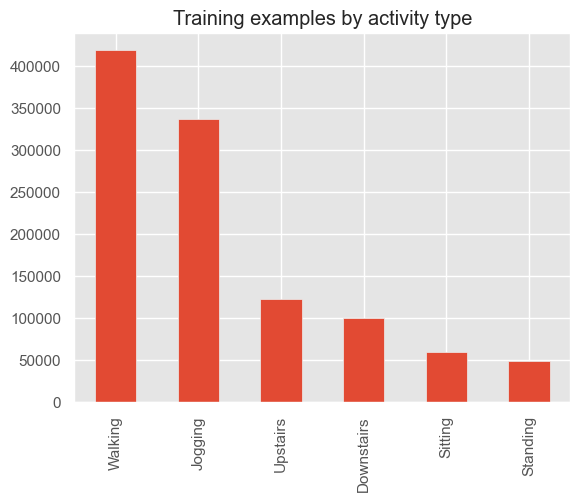

In [33]:
data['activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [35]:
import seaborn as sns

pd.options.display.float_format = "{:.1f}".format # Set some standard parameters upfront
sns.set() # Default seaborn look and feel
plt.style.use("ggplot")
LABELS = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
# The number of steps within one time segment
TIME_PERIODS = 80
# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 40

In [36]:
def read_data(file_path):
    column_names = ["user-id", "activity", "timestamp", "x-axis", "y-axis", "z-axis"]
    df = pd.read_csv(file_path, header = None, names = column_names, error_bad_lines=False)
    # Last column has a ";" character which must be removed ...
    df["z-axis"].replace(regex = True, inplace = True, to_replace = r';', value = r'')
    # ... and then this column must be transformed to float explicitly
    df["z-axis"] = df["z-axis"].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss will show up as NAN
    df.dropna(axis=0, how='any', inplace=True)
    return df

def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan
    
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print("Number of columns in the dataframe: %i" % (dataframe.shape[1]))
    print("Number of rows in the dataframe: %i\n" % (dataframe.shape[0]))

# Load data set containing all the data from csv
df = read_data('C:/HAR/WISDM/WISDM_ar_v1.1_raw.txt')

C:\Users\jycha\AppData\Local\Temp\ipykernel_21760\1246157274.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, header = None, names = column_names, error_bad_lines=False)
Skipping line 134634: expected 6 fields, saw 11
Skipping line 197687: expected 6 fields, saw 11

Skipping line 273261: expected 6 fields, saw 11
Skipping line 371932: expected 6 fields, saw 11

Skipping line 711484: expected 6 fields, saw 11

Skipping line 832903: expected 6 fields, saw 7
Skipping line 832904: expected 6 fields, saw 7
Skipping line 832905: expected 6 fields, saw 7
Skipping line 832906: expected 6 fields, saw 7
Skipping line 832907: expected 6 fields, saw 7
Skipping line 832908: expected 6 fields, saw 7
Skipping line 832909: expected 6 fields, saw 7
Skipping line 832910: expected 6 fields, saw 7
Skipping line 832911: expected 6 fields, saw 7
Skipping line 832912: expected 6 field

In [37]:
from sklearn import preprocessing

# Define column name of the label vector
LABEL = "ActivityEncoded"
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df[LABEL] = le.fit_transform(df["activity"].values.ravel())

In [38]:
# Differentiate between test set and training set
df_test = df[df["user-id"] > 28]
df_train = df[df["user-id"] <= 28]

In [39]:
# Normalize features for training data set (values between 0 and 1)
# Surpress warning for next 3 operation
pd.options.mode.chained_assignment = None  # default='warn'
df_train["x-axis"] = df_train["x-axis"] / df_train["x-axis"].max()
df_train["y-axis"] = df_train["y-axis"] / df_train["y-axis"].max()
df_train["z-axis"] = df_train["z-axis"] / df_train["z-axis"].max()
# Round numbers
df_train = df_train.round({"x-axis": 4, "y-axis": 4, "z-axis": 4})

In [40]:
import numpy as np
from scipy import stats
    
def create_segments_and_labels(df, time_steps, step, label_name):
    # x, y, z acceleration as features
    N_FEATURES = 3
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df["x-axis"].values[i: i + time_steps]
        ys = df["y-axis"].values[i: i + time_steps]
        zs = df["z-axis"].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([xs, ys, zs])
        labels.append(label)
    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)
    return reshaped_segments, labels

x_train, y_train = create_segments_and_labels(df_train, TIME_PERIODS, STEP_DISTANCE, LABEL)

C:\Users\jycha\AppData\Local\Temp\ipykernel_21760\711456694.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df[label_name][i: i + time_steps])[0][0]


In [41]:
show_basic_dataframe_info(df)
df.head(20)

Number of columns in the dataframe: 7
Number of rows in the dataframe: 1086465



,user-id,activity,timestamp,x-axis,y-axis,z-axis,ActivityEncoded
0,33,Jogging,49105962326000,-0.7,12.7,0.5,1
1,33,Jogging,49106062271000,5.0,11.3,1.0,1
2,33,Jogging,49106112167000,4.9,10.9,-0.1,1
3,33,Jogging,49106222305000,-0.6,18.5,3.0,1
4,33,Jogging,49106332290000,-1.2,12.1,7.2,1
5,33,Jogging,49106442306000,1.4,-2.5,-6.5,1
6,33,Jogging,49106542312000,-0.6,10.6,5.7,1
7,33,Jogging,49106652389000,-0.5,13.9,7.1,1
8,33,Jogging,49106762313000,-8.4,11.4,5.1,1
9,33,Jogging,49106872299000,1.0,1.4,1.6,1


<Axes: xlabel='activity', ylabel='count'>

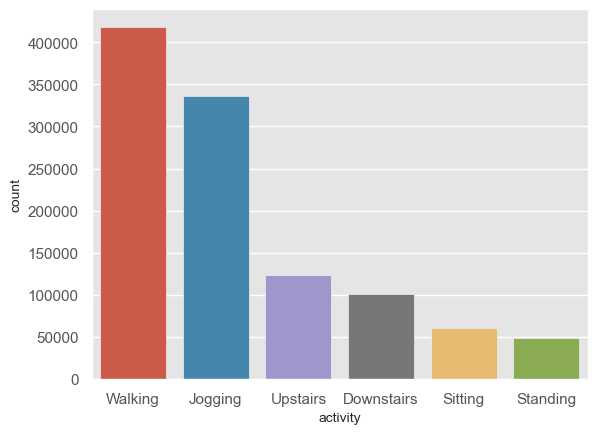

In [42]:
sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)

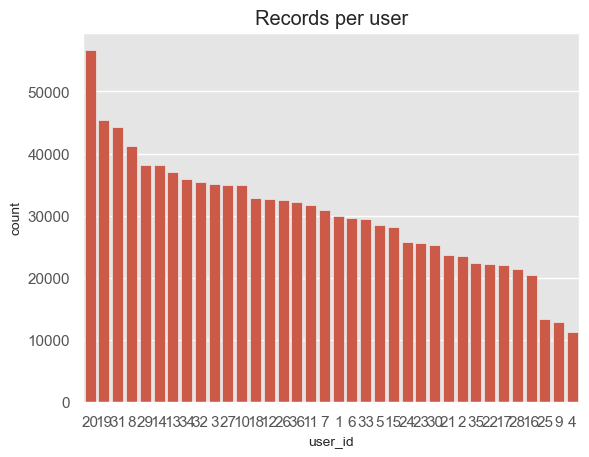

In [43]:
sns.countplot(x = "user_id", data = data, palette = [sns.color_palette()[0]],
              order = data.user_id.value_counts().index)
plt.title("Records per user");

In [44]:
print("x_train shape: ", x_train.shape)
print(x_train.shape[0], 'training samples')
print("y_train shape: ", y_train.shape)

x_train shape:  (20575, 80, 3)
20575 training samples
y_train shape:  (20575,)


In [45]:
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']


In [46]:
x_train = x_train.astype("float32")
y_train = y_train.astype("float32")

In [47]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_train, y_train = create_dataset(df_train[["x-axis", "y-axis", "z-axis"]], df_train.activity, TIME_STEPS,STEP)
X_test, y_test = create_dataset(df_test[["x-axis", "y-axis", "z-axis"]], df_test.activity, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

C:\Users\jycha\AppData\Local\Temp\ipykernel_21760\4232271078.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
C:\Users\jycha\AppData\Local\Temp\ipykernel_21760\4232271078.py:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  ys.append(stats.mode(labels)[0][0])
C:\Users\jycha\AppData\Local\Temp\ipykernel_21760\4232271078.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtos

(20572, 200, 3) (20572, 1)


In [48]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

print(X_train.shape, y_train.shape)

(20572, 200, 3) (20572, 6)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [50]:
#CNN MODEL

inputs=keras.Input(shape=(n_timesteps,n_features))


conv_1=tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=2,activation='relu')(inputs)
maxpool_1=tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(conv_1)

conv_2=tf.keras.layers.Conv1D(filters=96,kernel_size=3,strides=1,activation='relu')(maxpool_1)
maxpool_2=tf.keras.layers.MaxPooling1D(pool_size=2,strides=1)(conv_2)

conv_3=tf.keras.layers.Conv1D(filters=32,kernel_size=3,strides=1,activation='relu')(maxpool_2)
avg_pooling=tf.keras.layers.GlobalAveragePooling1D()(conv_3)
batch_norm=tf.keras.layers.BatchNormalization()(avg_pooling)

output=tf.keras.layers.Dense(n_outputs,activation='softmax')(batch_norm)
model=tf.keras.Model(inputs=inputs,outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 3)]          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 98, 64)            1024      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 49, 64)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 47, 96)            18528     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 46, 96)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 44, 32)            9248

In [51]:
import pydot
from tensorflow.keras.utils import plot_model 

plot_model(model, show_shapes=True, to_file='CNN_Model.png')
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [52]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from scipy import ndimage
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,Conv2D
from keras.layers.convolutional import MaxPooling1D,MaxPooling2D
from keras.layers import BatchNormalization,ReLU,GlobalAveragePooling1D,MaxPooling1D,LSTM,TimeDistributed,GlobalAveragePooling2D
#from keras.utils import to_categorical
from tensorflow.keras.models import save_model,load_model
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model,save_model,load_model
from keras.layers import Input
from keras.layers import concatenate

from datetime import datetime
from packaging import version

import os
import tempfile
import os
import tensorflow as tf
from tensorflow import expand_dims
from tensorflow import keras

In [53]:
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 )

history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=verbose,callbacks=[tboard_callback])
model.summary()

Epoch 1/10
643/643 [==============================] - 12s 15ms/step - loss: 0.3291 - accuracy: 0.8956
Epoch 2/10
643/643 [==============================] - 10s 15ms/step - loss: 0.0985 - accuracy: 0.9686
Epoch 3/10
643/643 [==============================] - 9s 15ms/step - loss: 0.0649 - accuracy: 0.9788
Epoch 4/10
643/643 [==============================] - 8s 13ms/step - loss: 0.0552 - accuracy: 0.9816
Epoch 5/10
643/643 [==============================] - 8s 13ms/step - loss: 0.0477 - accuracy: 0.9842
Epoch 6/10
643/643 [==============================] - 9s 14ms/step - loss: 0.0398 - accuracy: 0.9862
Epoch 7/10
643/643 [==============================] - 9s 14ms/step - loss: 0.0358 - accuracy: 0.9876
Epoch 8/10
643/643 [==============================] - 8s 13ms/step - loss: 0.0321 - accuracy: 0.9894
Epoch 9/10
643/643 [==============================] - 9s 13ms/step - loss: 0.0269 - accuracy: 0.9911
Epoch 10/10
643/643 [==============================] - 8s 13ms/step - loss: 0.0283 - accu

In [54]:
%time
print(X_test.shape,y_test.shape)
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)

cnn_file='CNN_Model.h5'
  
tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

CPU times: total: 0 ns
Wall time: 0 ns
(6581, 200, 3) (6581, 6)
206/206 [==============================] - 1s 5ms/step - loss: 53.1062 - accuracy: 0.4080
model saved at  CNN_Model.h5
Accuracy >40.799272
Base Loss >53.11
